# 1. Defining Hamiltonians in MPSKit

In [1]:
using MPSKit, MPSKitModels, TensorKit
using ProgressMeter, Plots

## 1.1 Spin operators
In MPSKit, the operators are defined as TensorMaps. The typical examples are spin operators, but there are other operators such as fermionic operators. Further information can be found [here](https://github.com/maartenvd/MPSKitModels.jl/tree/master/test).

In [2]:
# We specify the spins in the “spin” argument.
spin = 1//2
println(S_x(spin=spin))
println(S_y(spin=spin))
println(S_z(spin=spin))
println(S_plus(spin=spin))
println(S_min(spin=spin))

TensorMap(ℂ^2 ← ℂ^2):
 0.0 + 0.0im  0.5 + 0.0im
 0.5 + 0.0im  0.0 + 0.0im

TensorMap(ℂ^2 ← ℂ^2):
 0.0 + 0.0im  0.0 - 0.5im
 0.0 + 0.5im  0.0 + 0.0im

TensorMap(ℂ^2 ← ℂ^2):
 0.5 + 0.0im   0.0 + 0.0im
 0.0 + 0.0im  -0.5 + 0.0im

TensorMap(ℂ^2 ← ℂ^2):
 0.0 + 0.0im  1.0 + 0.0im
 0.0 + 0.0im  0.0 + 0.0im

TensorMap(ℂ^2 ← ℂ^2):
 0.0 + 0.0im  0.0 + 0.0im
 1.0 + 0.0im  0.0 + 0.0im



In [3]:
# type \bbC  for \mathbb styled C
my_σᶻ= TensorMap([1.0+0.0im 0.0;0.0 -1.0],ℂ^2 ← ℂ^2)
my_σᶻ≈ σᶻ(spin=1//2)

true

Two site operator are also defined in the same way.

In [4]:
spin = 1//2
println(S_xx(spin=spin))
println(S_yy(spin=spin))
println(S_zz(spin=spin))
println(S_plusmin(spin=spin))
println(S_minplus(spin=spin))

TensorMap((ℂ^2 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^2)):
[:, :, 1, 1] =
 0.0 + 0.0im   0.0 + 0.0im
 0.0 + 0.0im  0.25 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  0.25 + 0.0im
 0.0 + 0.0im   0.0 + 0.0im

[:, :, 1, 2] =
  0.0 + 0.0im  0.0 + 0.0im
 0.25 + 0.0im  0.0 + 0.0im

[:, :, 2, 2] =
 0.25 + 0.0im  0.0 + 0.0im
  0.0 + 0.0im  0.0 + 0.0im

TensorMap((ℂ^2 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^2)):
[:, :, 1, 1] =
 0.0 + 0.0im    0.0 + 0.0im
 0.0 + 0.0im  -0.25 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  0.25 + 0.0im
 0.0 + 0.0im   0.0 + 0.0im

[:, :, 1, 2] =
  0.0 + 0.0im  0.0 + 0.0im
 0.25 + 0.0im  0.0 + 0.0im

[:, :, 2, 2] =
 -0.25 - 0.0im  0.0 + 0.0im
   0.0 + 0.0im  0.0 + 0.0im

TensorMap((ℂ^2 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^2)):
[:, :, 1, 1] =
 0.25 + 0.0im  0.0 + 0.0im
  0.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
   0.0 + 0.0im   0.0 + 0.0im
 -0.25 + 0.0im  -0.0 + 0.0im

[:, :, 1, 2] =
 0.0 + 0.0im  -0.25 + 0.0im
 0.0 + 0.0im   -0.0 + 0.0im

[:, :, 2, 2] =
  0.0 + 0.0im  -0.0 + 0.0im
 -0.0 + 0.0im  0.25 - 0.0im

TensorMap((ℂ^2 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^2

Equivalently, we can define the two site operators using tensor product.

In [5]:
Z = S_z(spin = spin)
ZZ = Z ⊗ Z
ZZZ = Z ⊗ Z ⊗ Z

# \approx check if the two TensorMaps are close.
println(S_zz(spin=spin) ≈ ZZ)

true


In Julia, LaTeX format is supported. For example, $\sigma$ can be typed using “\sigma” and the tab key.

The above tensor product $\otimes$ corresponds to “\otimes”.

Lower and upper cases are a little tricky: You type “\sigma” + tab + “\\^z” + tab to obtain $\sigma^z$. ("\\_z" for lower case)

In [6]:
# Equivalent to 4*S_zz, yet written in the LaTeX format.
σᶻᶻ(spin=spin) ≈ 4*S_zz(spin=spin)

true

Ridiculous example might be the following. You might want to try some.

In [7]:
HₑₗₗₒWₒᵣₗᵈ = "Hello World"
print(HₑₗₗₒWₒᵣₗᵈ)

Hello World

## 1.2 Constructing Hamiltonian(FiniteChain)

Using spin operators, we can define Hamiltonian. Here, let us consider the transverse-field Ising model as an example!

In [8]:
# Definition of local terms. 
# Heisenberg term is XXZ_term = S_xx(spin=spin)+S_yy(spin=spin)+Δ*S_zz(spin=spin)
J = 1.0 
g = 1.0
ZZ_term = -J*4*S_zz(spin=spin)
X_term = -J*g*2*S_x(spin=spin)

TensorMap(ℂ^2 ← ℂ^2):
 -0.0 - 0.0im  -1.0 - 0.0im
 -1.0 - 0.0im  -0.0 - 0.0im


To construct the Hamiltonian, 

In [9]:
L = 100
χ = 20
lattice = FiniteChain(L)
H_TF = @mpoham sum(nearest_neighbours(lattice)) do (i, j)
            return ZZ_term{i,j}
        end + sum(vertices(lattice)) do i
            # println(i)
            return X_term{i}
    end;

For more general purposes, we can rewrite as following

In [10]:
L = 100
χ = 20
lattice = FiniteChain(L)
H_TF = @mpoham sum(1:(L-1)) do i
            return ZZ_term{lattice[i],lattice[i+1]}
        end + sum(1:L) do i
            return X_term{lattice[i]}
        end 
# Add + sum(1:(L-2)) do i return ZZZ{lattice[i],lattice[i+1],lattice[i+2] end 
# if you like to add terms with more sites.

MPOHamiltonian{ComplexSpace, TrivialTensorMap{ComplexSpace, 2, 2, Matrix{ComplexF64}}, ComplexF64}(MPSKit.SparseMPOSlice{ComplexSpace, TrivialTensorMap{ComplexSpace, 2, 2, Matrix{ComplexF64}}, ComplexF64}[[TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 1.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  1.0 + 0.0im
 TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 -1.4142135623730945 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  1.414213562373095 + 0.0im
 TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 -0.0 + 0.0im  -1.0 + 0.0im

[:, :, 2, 1] =
 -1.0 + 0.0im  0.0 + 0.0im
; TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 0.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  0.0 + 0.0im
 TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 0.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  0.0 + 0.0im
 TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 0.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  0.0 + 0.0im
; TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^

In [11]:
# 20 is bond dimension and C^2 is a physical space of spin-1/2
# If use C^(2*S+1) for spin-S systems.
state = FiniteMPS(rand,ComplexF64,L,ℂ^2,ℂ^χ)

100-site FiniteMPS:
┌ CL[101]: TensorMap(ℂ^1 ← ℂ^1)
├── AL[100]: TensorMap((ℂ^2 ⊗ ℂ^2) ← ℂ^1)
├── AL[99]: TensorMap((ℂ^4 ⊗ ℂ^2) ← ℂ^2)
├── AL[98]: TensorMap((ℂ^8 ⊗ ℂ^2) ← ℂ^4)
├── AL[97]: TensorMap((ℂ^16 ⊗ ℂ^2) ← ℂ^8)
├── AL[96]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^16)
├── AL[95]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[94]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[93]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[92]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[91]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[90]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
│⋮
├── AL[10]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[9]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[8]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[7]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[6]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[5]: TensorMap((ℂ^16 ⊗ ℂ^2) ← ℂ^20)
├── AL[4]: TensorMap((ℂ^8 ⊗ ℂ^2) ← ℂ^16)
├── AL[3]: TensorMap((ℂ^4 ⊗ ℂ^2) ← ℂ^8)
├── AL[2]: TensorMap((ℂ^2 ⊗ ℂ^2) ← ℂ^4)
└── AL[1]: TensorMap((ℂ^1 ⊗ ℂ^2) ← ℂ^2)


In [12]:
ψ₀, cache, delta = find_groundstate(state, H_TF, DMRG());

┌ Info: DMRG iteration:
│   iter = 1
│   ϵ = 0.00024328118403562425
│   λ = -126.96187567076527 - 1.408716284752873e-14im
└   Δt = 6.43229811
┌ Info: DMRG iteration:
│   iter = 2
│   ϵ = 7.642455077772253e-7
│   λ = -126.96187670949696 - 4.2475873389798025e-14im
└   Δt = 5.267200109
┌ Info: DMRG iteration:
│   iter = 3
│   ϵ = 2.4009053762327264e-7
│   λ = -126.96187671684163 + 8.981486069311423e-15im
└   Δt = 3.68572194
┌ Info: DMRG iteration:
│   iter = 4
│   ϵ = 2.9265902850381053e-7
│   λ = -126.96187672079755 - 2.7621002635872212e-14im
└   Δt = 3.142426381
┌ Info: DMRG iteration:
│   iter = 5
│   ϵ = 2.7770355672955783e-7
│   λ = -126.96187672195624 - 4.1071626239081336e-14im
└   Δt = 2.467800112
┌ Info: DMRG iteration:
│   iter = 6
│   ϵ = 1.490312838809389e-7
│   λ = -126.96187672209766 - 6.540422917465042e-14im
└   Δt = 1.831360626
┌ Info: DMRG iteration:
│   iter = 7
│   ϵ = 2.8347503185097247e-8
│   λ = -126.96187672210442 + 8.194818280939009e-14im
└   Δt = 1.155875888
┌ Info

┌ Info: DMRG iteration:
│   iter = 33
│   ϵ = 2.4663257975138506e-12
│   λ = -126.96187672210533 + 1.9537278240385177e-15im
└   Δt = 0.121372736
┌ Info: DMRG iteration:
│   iter = 34
│   ϵ = 1.8504464964608537e-12
│   λ = -126.96187672210559 + 1.1905454796192603e-14im
└   Δt = 0.124356277
┌ Info: DMRG iteration:
│   iter = 35
│   ϵ = 1.3884735272051386e-12
│   λ = -126.96187672210536 - 5.971353904220124e-14im
└   Δt = 0.120198247
┌ Info: DMRG iteration:
│   iter = 36
│   ϵ = 1.0418245867170371e-12
│   λ = -126.9618767221049 + 1.0570879485331159e-14im
└   Δt = 0.119926313
┌ Info: DMRG iteration:
│   iter = 37
│   ϵ = 7.813422181764901e-13
│   λ = -126.9618767221051 + 2.7559255196705912e-14im
└   Δt = 0.124580321
┌ Info: DMRG summary:
│   ϵ = 2.0e-12
│   λ = -126.9618767221051 + 2.7559255196705912e-14im
└   Δt = 30.994199949


In [13]:
E₀ = sum(real(expectation_value(ψ₀,H_TF)))/(L)

-1.269618767221051

In [14]:
-4/pi

-1.2732395447351628

## 1.3 Constructing Hamiltonian(InfiniteChain)

In [15]:
lattice∞ = InfiniteChain(1)
χ = 20
H_TF∞ = @mpoham sum(nearest_neighbours(lattice∞)) do (i, j)
            return ZZ_term{i,j}
        end + sum(vertices(lattice∞)) do i
            return X_term{i}
    end;

#### Equivalently, we can rewrite this as followings:

In [16]:
H_TF∞ = @mpoham sum(1:1) do i
            return ZZ_term{lattice∞[i],lattice∞[i+1]}
         end + sum(1:1) do i
            return X_term{lattice∞[i]}
    end;

In [17]:
random_data = TensorMap(rand, ComplexF64, ℂ^χ * ℂ^2, ℂ^χ);
state∞ = InfiniteMPS([random_data]);

In [18]:
# VUMPS can be seen as an upgrade of iDMRG
ψ₀∞, cache, delta = find_groundstate(state∞, H_TF∞, VUMPS());

┌ Info: VUMPS iteration:
│   iter = 1
│   ϵ = 0.01633214374074087
│   λ = -1.271543363982191 + 5.811323644522304e-17im
└   Δt = 0.058698582
┌ Info: VUMPS iteration:
│   iter = 2
│   ϵ = 0.0037055324208177367
│   λ = -1.2730109461698977 - 9.215718466126788e-17im
└   Δt = 0.039852579
┌ Info: VUMPS iteration:
│   iter = 3
│   ϵ = 0.0012108408744447808
│   λ = -1.2731937771503121 + 2.5912431922403556e-17im
└   Δt = 0.022396333
┌ Info: VUMPS iteration:
│   iter = 4
│   ϵ = 0.00044880030367765465
│   λ = -1.2732312808703898 + 3.946495907847236e-17im
└   Δt = 0.041431145
┌ Info: VUMPS iteration:
│   iter = 5
│   ϵ = 0.0001997555750716769
│   λ = -1.2732379980929571 + 2.5587171270657905e-17im
└   Δt = 0.024633526
┌ Info: VUMPS iteration:
│   iter = 6
│   ϵ = 0.00011671878884239153
│   λ = -1.2732388536129833 + 4.553649124439119e-18im
└   Δt = 0.039752709
┌ Info: VUMPS iteration:
│   iter = 7
│   ϵ = 8.913121898267925e-5
│   λ = -1.2732390450233981 + 7.047314121155779e-17im
└   Δt = 0.037716487

┌ Info: VUMPS iteration:
│   iter = 34
│   ϵ = 1.0298723227083343e-6
│   λ = -1.2732394732288634 + 2.656295322589486e-17im
└   Δt = 0.067935805
┌ Info: VUMPS iteration:
│   iter = 35
│   ϵ = 8.538596584567532e-7
│   λ = -1.2732394732350283 + 1.5178830414797062e-17im
└   Δt = 0.06185017
┌ Info: VUMPS iteration:
│   iter = 36
│   ϵ = 7.074292493153067e-7
│   λ = -1.2732394732392218 + 9.540979117872439e-18im
└   Δt = 0.069576619
┌ Info: VUMPS iteration:
│   iter = 37
│   ϵ = 5.862084718155937e-7
│   λ = -1.2732394732420718 + 1.0538445116559103e-16im
└   Δt = 0.067603372
┌ Info: VUMPS iteration:
│   iter = 38
│   ϵ = 4.855553974760596e-7
│   λ = -1.2732394732440089 + 4.5102810375396984e-17im
└   Δt = 0.063199471
┌ Info: VUMPS iteration:
│   iter = 39
│   ϵ = 4.0229031396232213e-7
│   λ = -1.2732394732453272 + 5.0523821237824507e-17im
└   Δt = 0.068853873
┌ Info: VUMPS iteration:
│   iter = 40
│   ϵ = 3.3323780961609564e-7
│   λ = -1.273239473246222 + 1.7564075194265172e-17im
└   Δt = 0.063

┌ Info: VUMPS iteration:
│   iter = 66
│   ϵ = 2.9916272792187865e-9
│   λ = -1.273239473248122 + 7.155734338404329e-17im
└   Δt = 0.062812984
┌ Info: VUMPS iteration:
│   iter = 67
│   ϵ = 2.52501183219866e-9
│   λ = -1.2732394732481254 + 1.6046192152785466e-17im
└   Δt = 0.058445509
┌ Info: VUMPS iteration:
│   iter = 68
│   ϵ = 2.133484074554585e-9
│   λ = -1.2732394732481234 + 2.1033522146218786e-17im
└   Δt = 0.064131426
┌ Info: VUMPS iteration:
│   iter = 69
│   ϵ = 1.8046475742876443e-9
│   λ = -1.2732394732481243 + 1.7672495411513722e-17im
└   Δt = 0.058551175
┌ Info: VUMPS iteration:
│   iter = 70
│   ϵ = 1.5281489416604736e-9
│   λ = -1.2732394732481247 - 1.5167988393072207e-16im
└   Δt = 0.062064829
┌ Info: VUMPS iteration:
│   iter = 71
│   ϵ = 1.2954207873056646e-9
│   λ = -1.273239473248125 + 4.705437428587089e-17im
└   Δt = 0.058393756
┌ Info: VUMPS iteration:
│   iter = 72
│   ϵ = 1.0993093719247565e-9
│   λ = -1.2732394732481247 + 1.6479873021779667e-17im
└   Δt = 0.06

┌ Info: VUMPS iteration:
│   iter = 98
│   ϵ = 2.0490740675044164e-11
│   λ = -1.273239473248125 + 3.74049749507499e-17im
└   Δt = 0.048126021
┌ Info: VUMPS iteration:
│   iter = 99
│   ϵ = 1.770539966243111e-11
│   λ = -1.2732394732481231 + 2.1467203015212988e-17im
└   Δt = 0.048454215
┌ Info: VUMPS iteration:
│   iter = 100
│   ϵ = 1.530119434302903e-11
│   λ = -1.2732394732481245 - 4.152494320619482e-17im
└   Δt = 0.048392114
┌ Warning: VUMPS maximum iterations
│   iter = 100
│   ϵ = 1.530119434302903e-11
│   λ = -1.2732394732481245 - 4.152494320619482e-17im
└ @ MPSKit ~/.julia/packages/MPSKit/atykv/src/algorithms/groundstate/vumps.jl:94
┌ Info: VUMPS summary:
│   ϵ = 1.530119434302903e-11
│   λ = -1.2732394732481245 - 4.152494320619482e-17im
└   Δt = 6.655449773


In [19]:
E₀ = real(expectation_value(ψ₀∞,H_TF∞))[0]
println("Exact ground state energy : ",-4/pi)
println("Numerical results : ", E₀)
println("Numerical errors : ", E₀+4/pi)

Exact ground state energy : -1.2732395447351628
Numerical results : -1.2732394732481245
Numerical errors : 7.14870382889643e-8


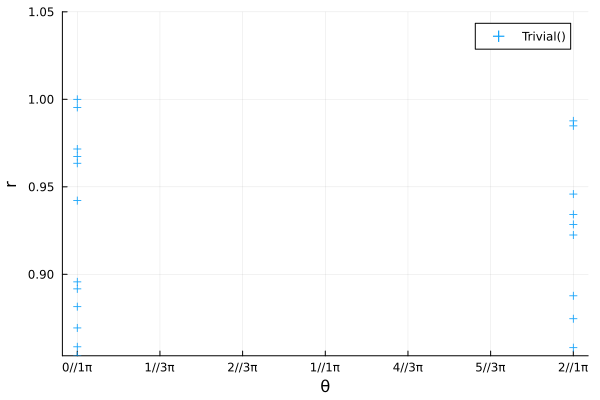

In [20]:
transferplot(ψ₀∞, ψ₀∞)

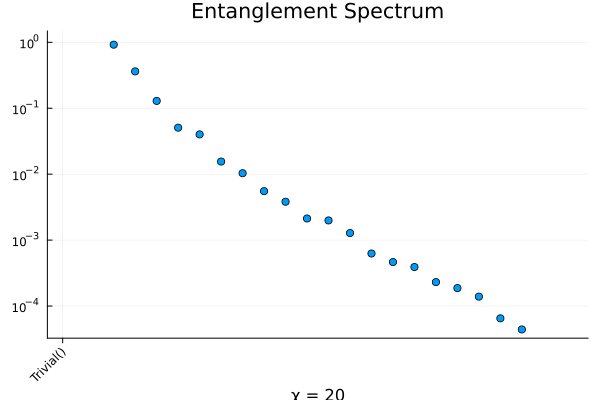

In [21]:
entanglementplot(ψ₀∞)

# 2. Entanglement spectrum and entropy

## 2.1 Entanglement entropy

Entanglement spectrum can be accessed through the $\textbf{entanglement_spectrum(psi, position)}$ function.
It returns Schmidt values $\Lambda_n$ at the entanglement cut. Meanwhile, entanglement spectrum is the spectrum $\lambda_n$ of a reduced density matrix $\rho_A$, and entanglement entropy is $S_A = \text{Tr} (\rho_A\ln\rho_A)$. These two are related in the following equalities.
\begin{align}
\lambda_n &= \Lambda_n^2\\
S_A &= \sum_n \lambda_n\ln (\lambda_n)
\end{align}

In [22]:
# position can be skipped for iDMRG. Equivalently, entanglement_spectrum(ψ₀∞,1)
Λₙ = entanglement_spectrum(ψ₀∞).values[1]
λₙ = Λₙ.^2

20-element Vector{Float64}:
 0.8475698558159628
 0.1311603731646339
 0.016684289330319787
 0.002572839752254752
 0.001608611117760106
 0.00024102933024918962
 0.00010694906007196732
 3.04835353096353e-5
 1.4578498876392616e-5
 4.526090184783951e-6
 3.952275057734626e-6
 1.6374057696509256e-6
 3.9242459719939856e-7
 2.1585617942841514e-7
 1.5258094136150933e-7
 5.3217871125552957e-8
 3.506733788141114e-8
 1.92848869566792e-8
 4.2424692946179244e-9
 1.949265903353012e-9

In [23]:
# Check if the reduced density is properly normalized.
sum(λₙ)

0.9999999999999997

##### $S_A$ can be straightforwardly computed from $\lambda_n$

In [24]:
println("SA : ",sum(-λₙ.*log.(λₙ)))
println()
println("Alternatively, we can use a built-in function.")
println("SA : ",real(entropy(ψ₀∞)[1]))

SA : 0.5041906182280506

Alternatively, we can use a built-in function.
SA : 0.5041906182280512


## 2.2 Finite-$\chi$ scaling
In iDMRG, we use $\xi(\chi)$ as a scaling parameter rather than the system size. CFT scaling then becomes
$$S_A(\chi) \approx \frac{c}{6}\ln\xi(\chi)$$

In [25]:
function compute_SA(χ)
    #Change accordingly for larger unitcell
    lattice∞ = InfiniteChain(1)
    # Your Hamiltonian
    H_TF∞ = @mpoham sum(nearest_neighbours(lattice∞)) do (i, j)
            return ZZ_term{i,j}
        end + sum(vertices(lattice∞)) do i
            return X_term{i}
    end
    # physical dimension : Spin 1/2
    d = 2
    random_data = TensorMap(rand, ComplexF64, ℂ^χ * ℂ^d, ℂ^χ);
    state∞ = InfiniteMPS([random_data])
    ψ₀∞, cache, delta = find_groundstate(state∞, H_TF∞, VUMPS())
    SA = real(entropy(ψ₀∞)[1])
    Λₙ = entanglement_spectrum(ψ₀∞).values[1]
    λₙ = Λₙ.^2
    ξ = correlation_length(ψ₀∞)
    return ξ,SA,λₙ
end


function finiteχ_scaling(χ_list,lattice∞,H∞,maxiter=5000)
    # physical dimension : Spin 1/2
     χ = χ_list[1]
    println(χ)
    random_data = TensorMap(rand, ComplexF64, ℂ^χ * H∞[1].pspace, ℂ^χ);
    ψ₀∞ = InfiniteMPS([random_data])
    ψ₀∞, env, delta = find_groundstate(ψ₀∞, H∞, VUMPS(tol_galerkin = 1e-12,maxiter = 800,verbose=false))
    ξ_list = [correlation_length(ψ₀∞)]
    SA_list = [real(entropy(ψ₀∞)[1])]
    @showprogress for i=1:(length(χ_list)-1)
        println(χ_list[i+1])
        δχ = χ_list[i+1] - χ_list[i]
        # expand the bond dimension of the previous ψ₀∞
        # This allows for VUMPS to converge faster
        ψ₀∞, env = changebonds(ψ₀∞, H∞,OptimalExpand(truncdim(δχ)), env)
        ψ₀∞, env, delta = find_groundstate(ψ₀∞, H∞ ,VUMPS(tol_galerkin = 1e-12,maxiter = maxiter,verbose=false),env)
        SA = real(entropy(ψ₀∞)[1])
        ξ = correlation_length(ψ₀∞)
        append!(ξ_list, ξ)
        append!(SA_list,SA)
    end
    return ξ_list,SA_list,ψ₀∞
end

finiteχ_scaling (generic function with 2 methods)

In [26]:
lattice∞ = InfiniteChain(1)
# Your Hamiltonian
H_TF∞ = @mpoham sum(nearest_neighbours(lattice∞)) do (i, j)
            return ZZ_term{i,j}
        end + sum(vertices(lattice∞)) do i
            return X_term{i}
        end

χ_list =collect(8:2:24)
println("χlist : ",χ_list)
ξ_list,SA_list,ψ₀∞ = finiteχ_scaling(χ_list,lattice∞,H_TF∞)

χlist : [8, 10, 12, 14, 16, 18, 20, 22, 24]
8
10
12


Progress:  25%|██████████▎                              |  ETA: 0:00:27

14


Progress:  38%|███████████████▍                         |  ETA: 0:00:20

16


Progress:  50%|████████████████████▌                    |  ETA: 0:00:15

18


Progress:  62%|█████████████████████████▋               |  ETA: 0:00:11

20


Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:08

22


Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:05

24


Progress: 100%|█████████████████████████████████████████| Time: 0:00:55


([34.04833257790293, 57.60673460131227, 82.71103868200792, 107.11668799384289, 142.00458764005742, 189.4603152632112, 223.92923104714333, 280.0800644070164, 315.27234486071234], [0.3473148367667588, 0.39511646362681746, 0.4226195771353251, 0.4432790767529165, 0.46866760902873206, 0.49128854239197145, 0.5029066523749415, 0.5240065678009677, 0.536573729925934], │   ⋮
│ CR[1]: TensorMap(ℂ^24 ← ℂ^24)
├── AL[1]: TensorMap((ℂ^24 ⊗ ℂ^2) ← ℂ^24)
│   ⋮
)

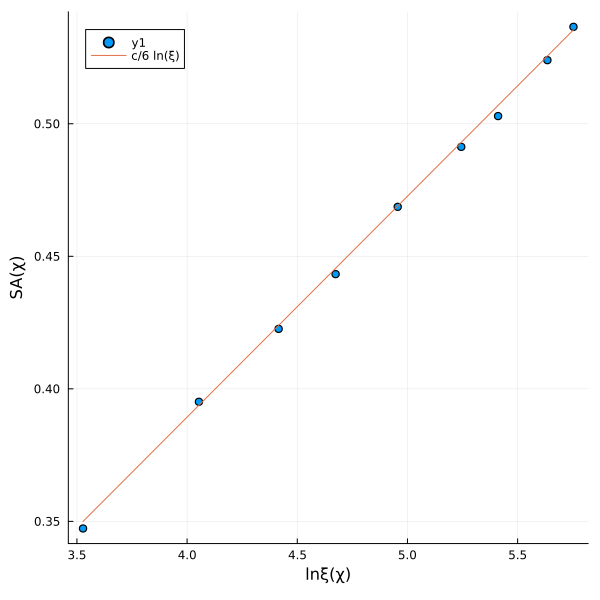

In [27]:
c=1/2
plot(log.(ξ_list),SA_list,st=:scatter,size=(600,600),xlabel="lnξ(χ)",ylabel="SA(χ)")
plot!(log.(ξ_list),c/6*log.(ξ_list).+0.056,label="c/6 ln(ξ)")

In [28]:
entanglement_spectrum(ψ₀∞)

TensorKit.SortedVectorDict{Trivial, Vector{Float64}} with 1 entry:
  Trivial() => [0.914379, 0.372348, 0.139085, 0.0565846, 0.0459752, 0.0185586, …

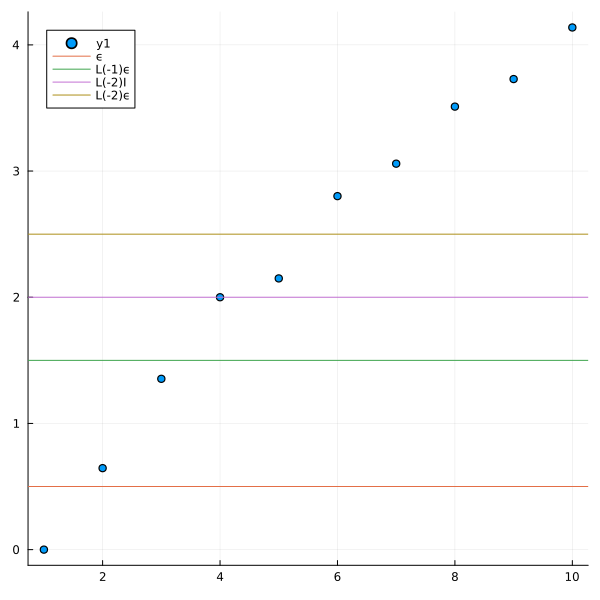

In [29]:
Λₙ = entanglement_spectrum(ψ₀∞).values[1]
λₙ = Λₙ.^2
normalization = log.(λₙ[1]./λₙ[4])
plot(2*log.(λₙ[1]./λₙ[1:10])/normalization,st=:scatter,size=(600,600))
hline!([0.5],label="ϵ")
hline!([1.5],label="L(-1)ϵ")
hline!([2.0],label="L(-2)I")
hline!([2.5],label="L(-2)ϵ")

## 2.3 Entanglement spectrum
Finally, let us take a closer look at the entanglement spectrum. We shall see the boundary scaling dimension as discussed in [Lauchil's paper](https://arxiv.org/pdf/1303.0741.pdf).
$$\ln \lambda_n \propto \Delta_n$$

In [30]:
L = 150
χ = 30
lattice = FiniteChain(L)
H_TF = @mpoham sum(1:(L-1)) do i
            return ZZ_term{lattice[i],lattice[i+1]}
        end + sum(1:L) do i
            return X_term{lattice[i]}
        end 
state = FiniteMPS(rand,ComplexF64,L,ℂ^2,ℂ^χ)
ψ₀, cache, delta = find_groundstate(state, H_TF, DMRG());

┌ Info: DMRG iteration:
│   iter = 1
│   ϵ = 0.00010567875993610195
│   λ = -190.62342000629204 + 2.8546617066055956e-15im
└   Δt = 34.221867281
┌ Info: DMRG iteration:
│   iter = 2
│   ϵ = 1.698419188196489e-7
│   λ = -190.62342124645332 + 3.218012223183895e-14im
└   Δt = 29.627846503
┌ Info: DMRG iteration:
│   iter = 3
│   ϵ = 5.8544915468717284e-8
│   λ = -190.6234212479953 - 6.309938952865344e-14im
└   Δt = 19.104733178
┌ Info: DMRG iteration:
│   iter = 4
│   ϵ = 4.835262813961025e-8
│   λ = -190.62342124863272 - 2.810027333775888e-14im
└   Δt = 15.376703221
┌ Info: DMRG iteration:
│   iter = 5
│   ϵ = 3.890519919459327e-8
│   λ = -190.62342124871788 + 1.8780454757311948e-13im
└   Δt = 11.42178938
┌ Info: DMRG iteration:
│   iter = 6
│   ϵ = 1.6181007092853125e-8
│   λ = -190.62342124872777 + 8.177885910865908e-14im
└   Δt = 8.329154768
┌ Info: DMRG iteration:
│   iter = 7
│   ϵ = 7.662705179889998e-9
│   λ = -190.6234212487299 + 2.4994044167380968e-14im
└   Δt = 6.545661355
┌ In

In [31]:
ψ₀

150-site FiniteMPS:
┌── AC[150]: TensorMap((ℂ^2 ⊗ ℂ^2) ← ℂ^1)
├── AL[149]: TensorMap((ℂ^4 ⊗ ℂ^2) ← ℂ^2)
├── AL[148]: TensorMap((ℂ^8 ⊗ ℂ^2) ← ℂ^4)
├── AL[147]: TensorMap((ℂ^16 ⊗ ℂ^2) ← ℂ^8)
├── AL[146]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^16)
├── AL[145]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[144]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[143]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[142]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[141]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[140]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
│⋮
├── AL[10]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[9]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[8]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[7]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[6]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[5]: TensorMap((ℂ^16 ⊗ ℂ^2) ← ℂ^30)
├── AL[4]: TensorMap((ℂ^8 ⊗ ℂ^2) ← ℂ^16)
├── AL[3]: TensorMap((ℂ^4 ⊗ ℂ^2) ← ℂ^8)
├── AL[2]: TensorMap((ℂ^2 ⊗ ℂ^2) ← ℂ^4)
└── AL[1]: TensorMap((ℂ^1 ⊗ ℂ^2) ← ℂ^2)


In [32]:
# Let us see the entanglement spectrum in the center
λₙ = entanglement_spectrum(ψ₀,50).values[1].^2;
println("Normalization : ",sum(λₙ))

Normalization : 1.0000000000000036


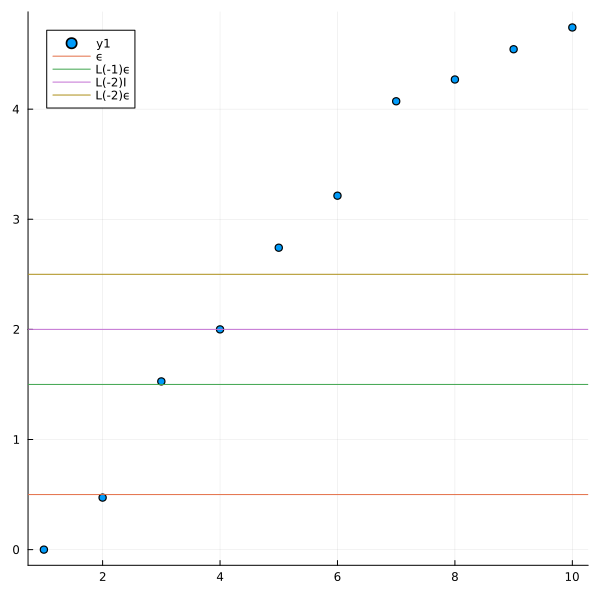

In [33]:
normalization = log.(λₙ[1]./λₙ[4])
plot(2*log.(λₙ[1]./λₙ[1:10])/normalization,st=:scatter,size=(600,600))
hline!([0.5],label="ϵ")
hline!([1.5],label="L(-1)ϵ")
hline!([2.0],label="L(-2)I")
hline!([2.5],label="L(-2)ϵ")

Finite-size effects persists logarithmically.



## 2.4 Finite-$\chi$ scaling with VUMPS

You can do the same thing with iDMRG.  For the purpose of accuracy, let us impose $\mathbf{\mathbb{Z}_2 symmetry}$.

In [34]:
# alg = VUMPS(;tol_galerkin = 1e-12,tol_gauge=1e-12,maxiter = 700,verbose=false)
χ = 40
H = transverse_field_ising(Z2Irrep,g=g)
Ψ₀ = InfiniteMPS([Rep[ℤ₂](0 => 1, 1 => 1)], [Rep[ℤ₂](0 => χ//2, 1 => χ//2)])
Ψ, envs, δ = find_groundstate(Ψ₀, H, VUMPS())

┌ Info: VUMPS iteration:
│   iter = 1
│   ϵ = 0.013003132711864863
│   λ = -1.2719208317074502 + 1.898573529293679e-16im
└   Δt = 0.114435432
┌ Info: VUMPS iteration:
│   iter = 2
│   ϵ = 0.0026630039269424496
│   λ = -1.2731098968494277 + 1.2685165418080402e-16im
└   Δt = 0.108851925
┌ Info: VUMPS iteration:
│   iter = 3
│   ϵ = 0.0006978607332723682
│   λ = -1.27322509857652 + 4.0115480381963664e-18im
└   Δt = 0.114676729
┌ Info: VUMPS iteration:
│   iter = 4
│   ϵ = 0.00019677524112788434
│   λ = -1.2732374344462558 - 4.618701254788249e-17im
└   Δt = 0.124508911
┌ Info: VUMPS iteration:
│   iter = 5
│   ϵ = 0.00010292070952091196
│   λ = -1.2732385118326413 + 1.212138028838794e-16im
└   Δt = 0.132757314
┌ Info: VUMPS iteration:
│   iter = 6
│   ϵ = 6.952977518488082e-5
│   λ = -1.2732389099408268 + 1.485356976305141e-17im
└   Δt = 0.181596956
┌ Info: VUMPS iteration:
│   iter = 7
│   ϵ = 6.80155973507424e-5
│   λ = -1.2732391537498602 + 2.233456475320139e-17im
└   Δt = 0.183368319
┌

┌ Info: VUMPS iteration:
│   iter = 33
│   ϵ = 1.9992642216817613e-6
│   λ = -1.2732395277446977 - 4.119968255444917e-17im
└   Δt = 0.421519926
┌ Info: VUMPS iteration:
│   iter = 34
│   ϵ = 1.8821021221776525e-6
│   λ = -1.2732395277568649 + 1.489693784995083e-16im
└   Δt = 0.425535724
┌ Info: VUMPS iteration:
│   iter = 35
│   ϵ = 1.7978134071086299e-6
│   λ = -1.2732395277666013 - 1.1167282376600696e-16im
└   Δt = 0.430187531
┌ Info: VUMPS iteration:
│   iter = 36
│   ϵ = 1.738735867866157e-6
│   λ = -1.2732395277746618 - 1.1709383462843448e-17im
└   Δt = 0.409792615
┌ Info: VUMPS iteration:
│   iter = 37
│   ϵ = 1.6994229843488907e-6
│   λ = -1.273239527781553 + 5.334274688628682e-17im
└   Δt = 0.428410439
┌ Info: VUMPS iteration:
│   iter = 38
│   ϵ = 1.6742613164119872e-6
│   λ = -1.2732395277876418 + 5.919743861770854e-17im
└   Δt = 0.426781577
┌ Info: VUMPS iteration:
│   iter = 39
│   ϵ = 1.6591483912518187e-6
│   λ = -1.273239527793176 - 2.8189256484623115e-18im
└   Δt = 0.43

┌ Info: VUMPS iteration:
│   iter = 65
│   ϵ = 8.459993430690177e-7
│   λ = -1.2732395278788804 + 3.7838655819744105e-17im
└   Δt = 0.444632038
┌ Info: VUMPS iteration:
│   iter = 66
│   ϵ = 7.988990551676459e-7
│   λ = -1.273239527879989 + 2.419939248987646e-16im
└   Δt = 0.443045298
┌ Info: VUMPS iteration:
│   iter = 67
│   ϵ = 7.534540914429774e-7
│   λ = -1.273239527880977 - 7.643625316022806e-17im
└   Δt = 0.444362021
┌ Info: VUMPS iteration:
│   iter = 68
│   ϵ = 7.097849349876128e-7
│   λ = -1.2732395278818567 - 3.3068166260807885e-17im
└   Δt = 0.438059765
┌ Info: VUMPS iteration:
│   iter = 69
│   ϵ = 6.679741538973057e-7
│   λ = -1.2732395278826392 + 4.7271214720367993e-17im
└   Δt = 0.442966787
┌ Info: VUMPS iteration:
│   iter = 70
│   ϵ = 6.280709200336067e-7
│   λ = -1.2732395278833284 - 8.044780119842443e-17im
└   Δt = 0.439633353
┌ Info: VUMPS iteration:
│   iter = 71
│   ϵ = 5.900956595006132e-7
│   λ = -1.273239527883943 + 1.0191500421363742e-17im
└   Δt = 0.44213906

┌ Info: VUMPS iteration:
│   iter = 97
│   ϵ = 1.073690498510524e-7
│   λ = -1.273239527888252 - 8.044780119842443e-17im
└   Δt = 0.454178601
┌ Info: VUMPS iteration:
│   iter = 98
│   ϵ = 1.0055500276451916e-7
│   λ = -1.273239527888271 - 1.0299920638612292e-16im
└   Δt = 0.467523732
┌ Info: VUMPS iteration:
│   iter = 99
│   ϵ = 9.418016434916223e-8
│   λ = -1.2732395278882878 - 3.0357660829594124e-18im
└   Δt = 0.463252784
┌ Info: VUMPS iteration:
│   iter = 100
│   ϵ = 8.82158152994614e-8
│   λ = -1.2732395278883006 - 4.575333167888829e-17im
└   Δt = 0.455097107
┌ Warning: VUMPS maximum iterations
│   iter = 100
│   ϵ = 8.82158152994614e-8
│   λ = -1.2732395278883006 - 4.575333167888829e-17im
└ @ MPSKit ~/.julia/packages/MPSKit/atykv/src/algorithms/groundstate/vumps.jl:94
┌ Info: VUMPS summary:
│   ϵ = 8.82158152994614e-8
│   λ = -1.2732395278883006 - 4.575333167888829e-17im
└   Δt = 40.480306179


(│   ⋮
│ CR[1]: TensorMap(Rep[ℤ₂](0=>20, 1=>20) ← Rep[ℤ₂](0=>20, 1=>20))
├── AL[1]: TensorMap((Rep[ℤ₂](0=>20, 1=>20) ⊗ Rep[ℤ₂](0=>1, 1=>1)) ← Rep[ℤ₂](0=>20, 1=>20))
│   ⋮
, MPSKit.MPOHamInfEnv{MPOHamiltonian{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, TensorMap{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, 2, 2, Z2Irrep, TensorKit.SortedVectorDict{Z2Irrep, Matrix{ComplexF64}}, FusionTree{Z2Irrep, 2, 0, 1, Nothing}, FusionTree{Z2Irrep, 2, 0, 1, Nothing}}, ComplexF64}, TensorMap{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, 2, 1, Z2Irrep, TensorKit.SortedVectorDict{Z2Irrep, Matrix{ComplexF64}}, FusionTree{Z2Irrep, 2, 0, 1, Nothing}, FusionTree{Z2Irrep, 1, 0, 0, Nothing}}, InfiniteMPS{TensorMap{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, 2, 1, Z2Irrep, TensorKit.SortedVectorDict{Z2Irrep, Matrix{ComplexF64}}, FusionTree{Z2Irrep, 2, 0, 1, Nothing}, FusionTree{Z2Irrep, 1, 0, 0, Nothing}}, TensorMap{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, 1, 1, Z2Irrep, TensorKit.SortedVectorDict{Z2Irrep, Matrix{C

In [35]:
if entanglement_spectrum(Ψ)[Z2Irrep(1)][1] > entanglement_spectrum(Ψ)[Z2Irrep(0)][1]
    even_sector,odd_sector = 1,0
else
    even_sector,odd_sector = 0,1
end
λ∞_odd = entanglement_spectrum(Ψ)[Z2Irrep(odd_sector)].^2
λ∞_even = entanglement_spectrum(Ψ)[Z2Irrep(even_sector)].^2;
println("Normalization : ",sum(λ∞_even) + sum(λ∞_odd))

Normalization : 1.0000000000000007


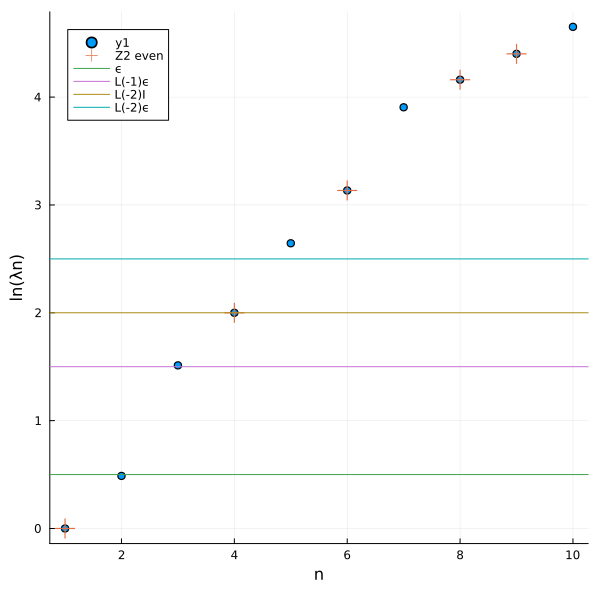

In [36]:
λ∞ = sort([λ∞_even..., λ∞_odd...],rev=true)
λmax = λ∞[1]
normalization = log(λ∞[1]/λ∞[4])
plot(2*log.(λmax./λ∞[1:10])/normalization,st=:scatter,size=(600,600))
plot!([1,4,6,8,9],2*log.(λmax./λ∞_even[1:5])/normalization,st=:scatter,marker=:plus,markersize=10,size=(600,600),label="Z2 even")
hline!([0.5],label="ϵ")
hline!([1.5],label="L(-1)ϵ")
hline!([2.0],label="L(-2)I")
hline!([2.5],label="L(-2)ϵ")

xlabel!("n")
ylabel!("ln(λn)")

# 3. Extension to custom operators

## 3.1 Custom operators using TensorMap
Let us define operators of the critical three-state Potts model. This model has the central charge $4/5$.

In [37]:
ω = exp(2*im*pi/3)
T = ComplexF64

ComplexF64 (alias for Complex{Float64})

In [38]:
# Clarify that you use "ComplexF64 as TensorMap read out the matrix as a complex variables.
Ω = TensorMap(T[1 0 0;0 ω 0;0 0 ω^2],ℂ^3←ℂ^3)
Γ = TensorMap(T[0 1 0.; 0. 0. 1.;1. 0. 0.],ℂ^3←ℂ^3)

TensorMap(ℂ^3 ← ℂ^3):
 0.0 + 0.0im  1.0 + 0.0im  0.0 + 0.0im
 0.0 + 0.0im  0.0 + 0.0im  1.0 + 0.0im
 1.0 + 0.0im  0.0 + 0.0im  0.0 + 0.0im


In [39]:
# Adjoint in this context is a Hermitian conjugate
first_term = -Ω⊗adjoint(Ω) - adjoint(Ω)⊗Ω
second_term = -Γ-adjoint(Γ)

TensorMap(ℂ^3 ← ℂ^3):
 -0.0 + 0.0im  -1.0 + 0.0im  -1.0 + 0.0im
 -1.0 + 0.0im  -0.0 + 0.0im  -1.0 + 0.0im
 -1.0 + 0.0im  -1.0 + 0.0im  -0.0 + 0.0im


In [40]:
lattice∞ = InfiniteChain(1)
H_Potts∞ =   @mpoham sum(1:1) do i
            return first_term{lattice∞[i],lattice∞[i+1]}+second_term{lattice∞[i]}
        end;

χ_list =collect(8:2:20)
println("χlist : ",χ_list)
ξ_list,SA_list,ψ₀∞ = finiteχ_scaling(χ_list,lattice∞,H_Potts∞)


χlist : [8, 10, 12, 14, 16, 18, 20]
8
10
12


Progress:  33%|█████████████▋                           |  ETA: 0:00:10

14


Progress:  50%|████████████████████▌                    |  ETA: 0:00:07

16


Progress:  67%|███████████████████████████▍             |  ETA: 0:00:05

18


Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:02

20


Progress: 100%|█████████████████████████████████████████| Time: 0:00:21


([7.292161649090154, 10.50129157901311, 17.237103864359103, 20.181014349025812, 23.078036965464733, 29.131097588153022, 32.95552898216069], [0.3248453091392488, 0.3644647444188849, 0.4251118445065991, 0.4509253937835758, 0.47430093445095695, 0.49314392910971294, 0.5116940614596489], │   ⋮
│ CR[1]: TensorMap(ℂ^20 ← ℂ^20)
├── AL[1]: TensorMap((ℂ^20 ⊗ ℂ^3) ← ℂ^20)
│   ⋮
)

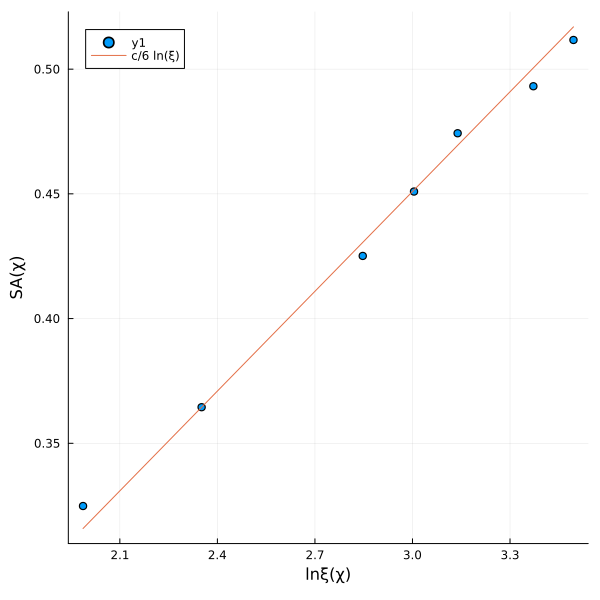

In [41]:
c = 0.8
plot(log.(ξ_list),SA_list,st=:scatter,size=(600,600),xlabel="lnξ(χ)",ylabel="SA(χ)")
plot!(log.(ξ_list),c/6*log.(ξ_list/ξ_list[2]).+SA_list[2],label="c/6 ln(ξ)")

## 3.2 Constructing Hamiltonians with symmetry

Some Hamiltonians respect symmetry. Exploiting it when you construct the Hamiltonian facilitate computation in DMRG and VUMPS.


Let us discuss it with examples.

$$H_{TF}  = -\sum X_iX_{i+1} - \sum_iZ_{i}$$

In [42]:
# Non-symmetric Z is previously defined as
print("Non-symmetric : \n",Z)

# Non-symmetric space is ℂ. Thus, bond-dimension 2 is ℂ^2

Non-symmetric : 
TensorMap(ℂ^2 ← ℂ^2):
 0.5 + 0.0im   0.0 + 0.0im
 0.0 + 0.0im  -0.5 + 0.0im


### Symmetric case

In symmetric cases, we assign the space one for each charge{0,1}. 

In [43]:
# The overall bond dimension becomes 1+1 = 2, which is compatible with ℂ^2
Vℤ₂=ZNSpace{2}(0 =>1, 1 => 1)
# For ℤ₃, we can assign the space as follows 
Vℤ₃=ZNSpace{3}(0 =>1, 1 => 1,2=>1)

Rep[ℤ₃](0=>1, 1=>1, 2=>1)

In [44]:
# ZNSpace{2}(0 => 1,1=>1)
Z_sym = 2*TensorMap(Z.data,Vℤ₂←Vℤ₂)

TensorMap(Rep[ℤ₂](0=>1, 1=>1) ← Rep[ℤ₂](0=>1, 1=>1)):
* Data for sector (Irrep[ℤ₂](0),) ← (Irrep[ℤ₂](0),):
 1.0 + 0.0im
* Data for sector (Irrep[ℤ₂](1),) ← (Irrep[ℤ₂](1),):
 -1.0 + 0.0im


There will be an error if we try to define tensors that are incompatible with the symmetry

In [45]:
try
    X_sym = TensorMap(T[0 1; 1 0],Rep[ℤ₂](0 =>1, 1 => 1)←Rep[ℤ₂](0 =>1, 1 => 1))
catch
    println("ArgumentError: Data has non-zero elements at incompatible positions")
end

ArgumentError: Data has non-zero elements at incompatible positions


X is not compatible because there is off-diagonal element that flips the ℤ₂ charge.


X⊗X on the other hand is okay.

In [46]:
X = σˣ(spin=1//2)
XX = X⊗X
XX_sym = TensorMap(XX.data,Vℤ₂⊗Vℤ₂←Vℤ₂⊗Vℤ₂);

lattice∞ = InfiniteChain(1)
H_TFsym∞ = @mpoham sum(1:1) do i
            return -XX_sym{lattice∞[i],lattice∞[i+1]}-Z_sym{lattice∞[i]}
        end;
# H_TFsym∞ = @mpoham sum(1:1) do i
#             return XX_sym{lattice∞[i],lattice∞[i+1]}
#          end + sum(1:1) do i
#             return Z_sym{lattice∞[i]}
#     end;

In [47]:
χ = 20
Ψ₀ = InfiniteMPS([Rep[ℤ₂](0 => 1, 1 => 1)], [Rep[ℤ₂](0 => χ//2, 1 => χ//2)])
Ψ, envs, δ = find_groundstate(Ψ₀, H_TFsym∞, VUMPS())

┌ Info: VUMPS iteration:
│   iter = 1
│   ϵ = 0.015008336500610288
│   λ = -1.2720278620713388 + 7.361330696272616e-17im
└   Δt = 0.082872402
┌ Info: VUMPS iteration:
│   iter = 2
│   ϵ = 0.0019819922896025266
│   λ = -1.2731924837083928 + 2.5342999799223755e-17im
└   Δt = 0.070928927
┌ Info: VUMPS iteration:
│   iter = 3
│   ϵ = 0.0005077119810839591
│   λ = -1.2732281700254164 - 6.405962164330603e-18im
└   Δt = 0.036526657
┌ Info: VUMPS iteration:
│   iter = 4
│   ϵ = 0.00028751090412171504
│   λ = -1.2732332679055702 + 2.523233348835366e-17im
└   Δt = 0.070682712
┌ Info: VUMPS iteration:
│   iter = 5
│   ϵ = 0.00019660247901941096
│   λ = -1.2732359692500257 - 3.729799333135796e-17im
└   Δt = 0.060518999
┌ Info: VUMPS iteration:
│   iter = 6
│   ϵ = 0.00014671317449662605
│   λ = -1.2732373718657142 - 5.3539367283659186e-17im
└   Δt = 0.080690634
┌ Info: VUMPS iteration:
│   iter = 7
│   ϵ = 0.0001160648952202804
│   λ = -1.2732381181144694 - 5.943661503731945e-17im
└   Δt = 0.06891

┌ Info: VUMPS iteration:
│   iter = 33
│   ϵ = 2.0322813314185903e-6
│   λ = -1.2732392487861577 + 5.1276568845071476e-17im
└   Δt = 0.108522292
┌ Info: VUMPS iteration:
│   iter = 34
│   ϵ = 1.7198873543105957e-6
│   λ = -1.2732392488190607 - 7.22019309444996e-17im
└   Δt = 0.093341651
┌ Info: VUMPS iteration:
│   iter = 35
│   ϵ = 1.4551027875969927e-6
│   λ = -1.2732392488425353 - 8.357299440460782e-17im
└   Δt = 0.108012561
┌ Info: VUMPS iteration:
│   iter = 36
│   ϵ = 1.2307898564787458e-6
│   λ = -1.2732392488592783 + 8.58496552637639e-18im
└   Δt = 0.109392358
┌ Info: VUMPS iteration:
│   iter = 37
│   ϵ = 1.0408451133041087e-6
│   λ = -1.2732392488712234 + 6.1259823684834245e-18im
└   Δt = 0.11002069
┌ Info: VUMPS iteration:
│   iter = 38
│   ϵ = 8.800639646256422e-7
│   λ = -1.2732392488797437 + 2.8422415184239535e-17im
└   Δt = 0.09466805
┌ Info: VUMPS iteration:
│   iter = 39
│   ϵ = 7.440131163560744e-7
│   λ = -1.2732392488858197 + 1.773040167113098e-17im
└   Δt = 0.10848

┌ Info: VUMPS iteration:
│   iter = 65
│   ϵ = 9.339375310542434e-9
│   λ = -1.273239248900932 + 1.9625769189929252e-17im
└   Δt = 0.118142267
┌ Info: VUMPS iteration:
│   iter = 66
│   ϵ = 7.893218525584554e-9
│   λ = -1.273239248900934 + 3.648852350499341e-17im
└   Δt = 0.11946505
┌ Info: VUMPS iteration:
│   iter = 67
│   ϵ = 6.671166577582274e-9
│   λ = -1.2732392489009348 - 3.1650505464520826e-17im
└   Δt = 0.119891563
┌ Info: VUMPS iteration:
│   iter = 68
│   ϵ = 5.638469930586943e-9
│   λ = -1.2732392489009352 + 1.5714617293183318e-17im
└   Δt = 0.120598263
┌ Info: VUMPS iteration:
│   iter = 69
│   ϵ = 4.765768312478653e-9
│   λ = -1.2732392489009356 - 2.6035055265837845e-17im
└   Δt = 0.119207618
┌ Info: VUMPS iteration:
│   iter = 70
│   ϵ = 4.028253860210436e-9
│   λ = -1.2732392489009359 - 1.0673152970537696e-16im
└   Δt = 0.113897547
┌ Info: VUMPS iteration:
│   iter = 71
│   ϵ = 3.404967496758377e-9
│   λ = -1.2732392489009352 + 8.431652961154849e-17im
└   Δt = 0.1128072

┌ Info: VUMPS iteration:
│   iter = 97
│   ϵ = 4.3551805825504534e-11
│   λ = -1.2732392489009352 + 7.483435762906933e-17im
└   Δt = 0.089034593
┌ Info: VUMPS iteration:
│   iter = 98
│   ϵ = 3.684472506730021e-11
│   λ = -1.2732392489009352 + 8.9396569656958e-17im
└   Δt = 0.097308811
┌ Info: VUMPS iteration:
│   iter = 99
│   ϵ = 3.117687619884163e-11
│   λ = -1.2732392489009356 - 2.1978033927017828e-17im
└   Δt = 0.099550799
┌ Info: VUMPS iteration:
│   iter = 100
│   ϵ = 2.6384423441280143e-11
│   λ = -1.2732392489009356 + 1.6895903776346147e-17im
└   Δt = 0.080848823
┌ Warning: VUMPS maximum iterations
│   iter = 100
│   ϵ = 2.6384423441280143e-11
│   λ = -1.2732392489009356 + 1.6895903776346147e-17im
└ @ MPSKit ~/.julia/packages/MPSKit/atykv/src/algorithms/groundstate/vumps.jl:94
┌ Info: VUMPS summary:
│   ϵ = 2.6384423441280143e-11
│   λ = -1.2732392489009356 + 1.6895903776346147e-17im
└   Δt = 10.451105251


(│   ⋮
│ CR[1]: TensorMap(Rep[ℤ₂](0=>10, 1=>10) ← Rep[ℤ₂](0=>10, 1=>10))
├── AL[1]: TensorMap((Rep[ℤ₂](0=>10, 1=>10) ⊗ Rep[ℤ₂](0=>1, 1=>1)) ← Rep[ℤ₂](0=>10, 1=>10))
│   ⋮
, MPSKit.MPOHamInfEnv{MPOHamiltonian{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, TensorMap{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, 2, 2, Z2Irrep, TensorKit.SortedVectorDict{Z2Irrep, Matrix{ComplexF64}}, FusionTree{Z2Irrep, 2, 0, 1, Nothing}, FusionTree{Z2Irrep, 2, 0, 1, Nothing}}, ComplexF64}, TensorMap{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, 2, 1, Z2Irrep, TensorKit.SortedVectorDict{Z2Irrep, Matrix{ComplexF64}}, FusionTree{Z2Irrep, 2, 0, 1, Nothing}, FusionTree{Z2Irrep, 1, 0, 0, Nothing}}, InfiniteMPS{TensorMap{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, 2, 1, Z2Irrep, TensorKit.SortedVectorDict{Z2Irrep, Matrix{ComplexF64}}, FusionTree{Z2Irrep, 2, 0, 1, Nothing}, FusionTree{Z2Irrep, 1, 0, 0, Nothing}}, TensorMap{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, 1, 1, Z2Irrep, TensorKit.SortedVectorDict{Z2Irrep, Matrix{C

In [48]:
E0 = real(expectation_value(Ψ,H_TFsym∞))[1]
println("E0(VUMPS) :\t",E0)
println("E0 exact :\t", -4/pi)
println("δE0 :\t\t",4/pi+E0)

E0(VUMPS) :	-1.2732392489009352
E0 exact :	-1.2732395447351628
δE0 :		2.958342275594106e-7


In [49]:
if entanglement_spectrum(Ψ)[Z2Irrep(1)][1] > entanglement_spectrum(Ψ)[Z2Irrep(0)][1]
    even_sector,odd_sector = 1,0
else
    even_sector,odd_sector = 0,1
end
λ∞_odd = entanglement_spectrum(Ψ)[Z2Irrep(odd_sector)].^2
λ∞_even = entanglement_spectrum(Ψ)[Z2Irrep(even_sector)].^2

10-element Vector{Float64}:
 0.6924637134921824
 0.011850992453407556
 0.0010330322989765331
 0.0001243435053303304
 5.547111116441663e-5
 6.112860330700714e-6
 1.1893983402209283e-6
 4.804658477317645e-7
 1.0869082497075955e-7
 7.123774663614581e-9

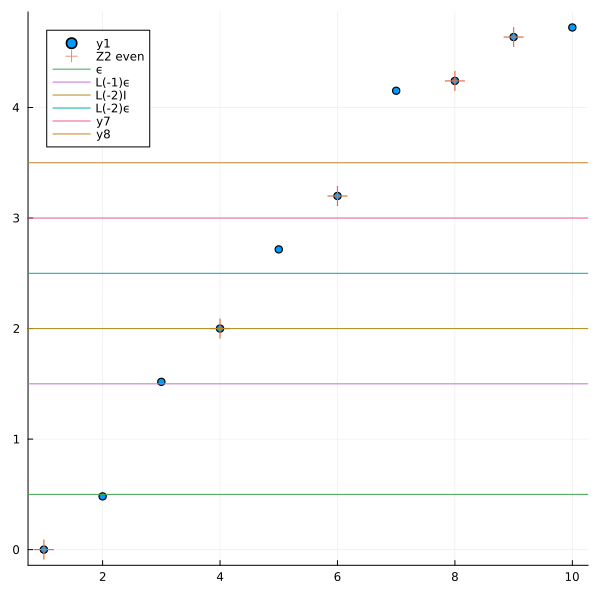

In [50]:
λ∞ = sort([λ∞_even..., λ∞_odd...],rev=true)
λmax = λ∞[1]
normalization = log(λ∞[1]/λ∞[4])
plot(2*log.(λmax./λ∞[1:10])/normalization,st=:scatter,size=(600,600))
plot!([1,4,6,8,9],2*log.(λmax./λ∞_even[1:5])/normalization,st=:scatter,marker=:plus,markersize=10,size=(600,600),label="Z2 even")
hline!([0.5],label="ϵ")
hline!([1.5],label="L(-1)ϵ")
hline!([2.0],label="L(-2)I")
hline!([2.5],label="L(-2)ϵ")
hline!([3])
hline!([3.5])

### Yay!
### You might wanna practice this by imposing $\mathbb{Z}_3$ on the three-state Potts?

To be continued...